In [1]:
import pandas
import numpy as np

In [45]:
li=[]
for i in range(10,20):
    print('{}{}'.format(i,i+1))
    boxscore=pandas.read_csv('./boxscore/gamehunx{}{}.csv'.format(i,i+1),header=None)
    li.append(boxscore)
boxscore = pandas.concat(li, axis=0, ignore_index=True)

1011
1112
1213
1314
1415
1516
1617
1718
1819
1920


In [46]:
boxscore.columns=["CODE","team","GM","Min","PF","DF","2Pm","2Pa","2PP","3Pm","3Pa","3PP","FTm","Fta","FTP","ORB","DRB","TRB","BS","SR","TOV","ST","ASS","PTS", "VALU","OP","OER","ASTO","VIR","extra1","date","extra3","nat"]

In [47]:
boxscore=boxscore.drop(axis=1,labels=['VALU','OP','OER','ASTO','VIR','extra3','GM','CODE','nat'])

In [5]:
f = dict.fromkeys(boxscore.columns, 'sum')
f.update(
    dict.fromkeys(['2PP','3PP','FTP','date'], 'mean'))

In [48]:
result=boxscore.groupby(['extra1','date','team']).agg(f)

In [49]:
result=result.drop(axis=1,labels=['extra1','team','Min','date'])
result.columns

Index(['PF', 'DF', '2Pm', '2Pa', '2PP', '3Pm', '3Pa', '3PP', 'FTm', 'Fta',
       'FTP', 'ORB', 'DRB', 'TRB', 'BS', 'SR', 'TOV', 'ST', 'ASS', 'PTS'],
      dtype='object')

In [50]:
result=result.reset_index()

In [51]:
result=result.sort_values(["date",'extra1'])

In [52]:
result

,extra1,date,team,PF,DF,2Pm,2Pa,2PP,3Pm,3Pa,...,FTP,ORB,DRB,TRB,BS,SR,TOV,ST,ASS,PTS
1240,900,20101009,9005,18,17,23,32,607.666667,12,31,...,541.666667,6,16,22,5,1,9,20,27,97
1241,900,20101009,40051,17,18,22,42,297.090909,3,10,...,382.272727,12,12,24,1,5,14,11,4,67
1244,901,20101009,9007,17,27,23,35,421.545455,6,24,...,431.818182,10,26,36,4,3,11,8,17,86
1245,901,20101009,9013,27,17,26,49,244.333333,5,17,...,229.166667,7,19,26,3,4,11,9,13,77
1248,902,20101009,9003,14,18,26,40,577.750000,14,26,...,494.416667,11,25,36,0,0,12,9,21,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,1302,20200307,9230,15,16,24,37,316.916667,7,23,...,429.166667,3,19,22,0,0,9,9,20,82
2618,1303,20200307,9002,22,20,20,35,467.083333,8,29,...,347.250000,10,23,33,4,3,15,7,16,74
2619,1303,20200307,9006,20,22,24,41,378.800000,6,23,...,362.500000,8,26,34,3,4,10,6,20,79
2622,1304,20200307,6015,21,20,20,39,279.166667,3,23,...,451.416667,8,25,33,2,0,14,8,16,66


In [53]:
data=pandas.DataFrame(columns=['gameid',"teamid","2PP","3PP","DRB%","ASS%","TOV%","Win%","3PTS/PTS","FTP"])

In [54]:
data['gameid']=result['extra1']
data["teamid"]=result["team"]
data['date']=result['date']
data["2PP"]=result["2PP"]/10
data["3PP"]=result["3PP"]/10
data["FTP"]=result["FTP"]/10
data["3PTS/PTS"]=result["3Pm"]*3/result["PTS"]*100
data["FT/PTS"]=result["FTm"]/result["PTS"]*100
data["Poss"]=0.96*(result['2Pa']+result['3Pa']+0.44*result['Fta']+result['TOV']-result['ORB'])
data["ASS%"]=result['ASS']/(result['2Pa']+result['3Pa']+0.44*result['Fta']+result['TOV']+result['ASS'])*100
data["TOV%"]=result['TOV']/(result['2Pa']+result['3Pa']+0.44*result['Fta']+result['TOV']+result['ASS'])*100
data['OffRating']=100*result['PTS']/data['Poss']
data['DF']=result['DF']

In [14]:
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [55]:
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
lista8=[]
for (i1, row1), (i2, row2) in pairwise(result.sort_values(['date','extra1']).iterrows()):    
    if(row1['extra1']==row2['extra1']):
        if(row1['PTS']>row2['PTS']):
            lista1.append(100)
            lista1.append(0)
        else:
            lista1.append(0)
            lista1.append(100)
        lista2.append(row1['DRB']/(row2['Fta']-row2['FTm']+row2['2Pa']-row2['2Pm']+row2['3Pa']-row2['3Pm'])*100)
        lista2.append(row2['DRB']/(row1['Fta']-row1['FTm']+row1['2Pa']-row1['2Pm']+row1['3Pa']-row1['3Pm'])*100)
        lista3.append(row2['PTS']/(0.96*(row1['2Pa']+row1['3Pa']+0.44*row1['Fta']+row1['TOV']-row1['ORB']))*100)
        lista3.append(row1['PTS']/(0.96*(row2['2Pa']+row2['3Pa']+0.44*row2['Fta']+row2['TOV']-row2['ORB']))*100)
        lista4.append(row1['ST']/(0.96*(row2['2Pa']+row2['3Pa']+0.44*row2['Fta']+row2['TOV']-row2['ORB']))*100)
        lista4.append(row2['ST']/(0.96*(row1['2Pa']+row1['3Pa']+0.44*row1['Fta']+row1['TOV']-row1['ORB']))*100)
        lista5.append(row1['ORB']/(row1['ORB']+row2['DRB'])*100)
        lista5.append(row2['ORB']/(row2['ORB']+row1['DRB'])*100)
        lista6.append(row1['BS']/(row2['2Pa']+row2['3Pa'])*100)
        lista6.append(row2['BS']/(row1['2Pa']+row1['3Pa'])*100)
        lista7.append(row2['3PP']/10)
        lista7.append(row1['3PP']/10)
        lista8.append(row2['2PP']/10)
        lista8.append(row1['2PP']/10)

In [56]:
data['Win%']=lista1
data['DRB%']=lista2
data['DefRating']=lista3
data['ST%']=lista4
data['ORB%']=lista5
data['BL%']=lista6
data['Opp_3PP']=lista7
data['Opp_2PP']=lista8

In [57]:
data=data.sort_values(['teamid','date','gameid'])
data=data.reset_index()
data=data.drop(axis=1,columns=['index'])

In [62]:
szezon=[]
date=20100830
for j,r in data.iterrows():
    for i in range(0,10):
        if((r['date']>date+i*10000) &(r['date']<date+(i+1)*10000)):
            szezon.append(i)
            break

In [63]:
data['szezon']=szezon

In [132]:
byszezon=data[~data['teamid'].isin([9221,9233,40051,9218])]
byszezon=byszezon[~byszezon['szezon'].isin([8,9])]

In [133]:
elozoevekatlaga=byszezon.groupby(['teamid']).mean()
elozoevekatlaga=elozoevekatlaga.reset_index()
elozoevekatlaga

,teamid,gameid,2PP,3PP,DRB%,ASS%,TOV%,Win%,3PTS/PTS,FTP,...,Poss,OffRating,DF,DefRating,ST%,ORB%,BL%,Opp_3PP,Opp_2PP,szezon
0,6015,756.423077,40.095765,19.983080,62.038239,17.341078,11.480461,77.692308,31.251759,33.829158,...,71.356652,119.243180,20.246154,104.931419,12.770500,30.238704,4.133511,17.014331,33.094916,3.800000
1,9001,867.570707,39.704525,18.536675,64.054910,15.643939,12.227681,72.222222,25.855783,31.814961,...,73.172945,117.041179,20.025253,102.311829,14.170923,30.849666,5.070582,16.553009,33.047938,3.535354
2,9002,869.737374,38.602945,17.467850,61.312496,16.225221,12.315454,60.606061,27.738353,32.059737,...,71.914279,118.339608,20.626263,112.649630,10.315413,29.926900,3.189742,17.370205,34.964116,3.535354
3,9003,868.540404,37.541038,19.493983,60.704346,14.770598,11.584584,62.626263,31.839334,29.703687,...,71.429430,118.197823,20.020202,110.729567,12.169765,29.116338,3.631110,16.412219,34.211737,3.535354
4,9004,870.702020,33.707735,14.373719,61.783475,15.525075,12.793621,52.525253,23.719259,30.938424,...,72.259685,113.198306,20.065657,114.700710,10.924088,28.609968,3.936884,17.802389,36.492156,3.535354
5,9005,877.590909,34.032059,17.234876,60.860009,15.078019,12.313777,42.424242,30.631337,29.505911,...,70.069721,111.257467,19.116162,116.798316,12.315285,26.742127,3.179154,17.470244,36.869498,3.535354
6,9006,875.681818,36.387610,18.738464,61.710115,15.081032,12.413774,50.000000,30.808997,31.015582,...,69.631224,114.002511,19.909091,112.087194,10.918873,27.732833,3.082581,17.183936,34.373659,3.535354
7,9007,867.808081,38.596546,19.940995,62.847677,15.760078,12.235408,67.171717,28.783499,34.311666,...,71.569648,116.670513,19.560606,107.289073,11.620103,30.629345,3.349288,16.554544,33.498920,3.535354
8,9011,937.356164,33.557812,15.254445,58.717650,13.037179,13.165168,30.136986,25.615410,28.192062,...,71.729359,108.236177,19.972603,118.970334,14.606579,25.293085,3.066015,19.280879,37.704096,2.479452
9,9013,874.217172,32.514114,14.950735,59.830066,15.662125,13.407239,38.888889,27.275667,31.698091,...,72.612848,110.595623,20.181818,114.698286,11.389099,25.356401,3.077821,16.576604,37.819650,3.535354


In [66]:
data.groupby(['teamid','szezon']).count().groupby('teamid').count()

,gameid,2PP,3PP,DRB%,ASS%,TOV%,Win%,3PTS/PTS,FTP,date,FT/PTS,Poss,OffRating,DF,DefRating,ST%,ORB%,BL%,Opp_3PP,Opp_2PP
teamid,,,,,,,,,,,,,,,,,,,,
6015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
9001,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9002,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9003,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9004,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9005,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9006,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9007,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9011,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [153]:
cnt=1
actual_team=0
index=0
lista=[]
for i,r in data.iterrows():
    adatok=[]
    if(r["teamid"]==actual_team):
        if(r['date']>20180830):
            cnt+=1
            if((actual_team in [40010,9217])&(cnt>5)):
                last_five=data[i-5:i]
                season=data[i-cnt:i]
                for c in data.columns:
                    if(c  in ['OffRating', 'ASS%','2PP', '3PP','TOV%','DRB%','ST%','BL%']):
                        adatok.append(last_five[c].mean())
                    if(c  in ['DefRating','Win%','3PTS/PTS', 'FTP','FT/PTS','Poss','Opp_3PP','DF']):
                        adatok.append(season[c].mean())
                    if(c  in ['OffRating','Win%','3PTS/PTS', 'ST%','FT/PTS','ORB%','Opp_2PP','TO%']):
                        adatok.append(season[c].mean())
            if(actual_team not in [40010,9217]):
                last_five=data[i-5:i]
                season=data[i-20:i]
                eves=elozoevekatlaga[elozoevekatlaga['teamid']==actual_team]
                adatok.append(r['gameid'])
                adatok.append(actual_team)
                for c in data.columns:
                    if(c  in ['OffRating', 'ASS%','2PP', '3PP','TOV%','DRB%','ST%','BL%']):
                        #print(c,':',last_five[c].mean())
                        adatok.append(last_five[c].mean())
                    if(c  in ['DefRating','Win%','3PTS/PTS', 'FTP','FT/PTS','Poss','Opp_3PP','DF']):
                        #print(c,':',season[c].mean())
                        adatok.append(season[c].mean())
                    if(c  in ['OffRating','Win%','3PTS/PTS', 'ST%','FT/PTS','ORB%','Opp_2PP','TOV%']):
                        #print(c,':',eves[c].mean())
                        adatok.append(eves[c].mean())
                adatok.append(r['date'])
                lista.append(adatok)
    else:
        actual_team=r["teamid"]
        cnt=1
        first=0

In [84]:
data.columns

Index(['gameid', 'teamid', '2PP', '3PP', 'DRB%', 'ASS%', 'TOV%', 'Win%',
       '3PTS/PTS', 'FTP', 'date', 'FT/PTS', 'Poss', 'OffRating', 'DefRating'],
      dtype='object')

In [151]:
len(lista)

625

In [154]:
data2=pandas.DataFrame(data=lista,columns=['gameid',"teamid",'2PP_g', '3PP_g', 'DRB%_g', 'ASS%_g', 'TOV%_g','TOV%_y', 'Win%_s','Win%_y','3PTS/PTS_s','3PTS/PTS_y', 'FTP_s','FT/PTS_s','FT/PTS_y', 'Poss_s', 'OffRating_g','OffRating_y', 'DF_s','DefRating_s','ST%_g','ST%_y','ORB%_y','BL%_g','Opp_3PP_s','Opp_2PP_y','date'])

In [137]:
data2.sort_values(['date','gameid'])

,gameid,teamid,2PP_g,3PP_g,DRB%_g,ASS%_g,TOV%_g,TOV%_y,Win%_s,Win%_y,...,OffRating_y,DF_s,DefRating_s,ST%_g,ST%_y,ORB%_y,BL%_g,Opp_3PP_s,Opp_2PP_y,date
138,982.0,9003.0,41.266667,21.573333,63.689417,18.206484,13.024355,11.584584,65.0,62.626263,...,118.197823,19.25,114.344168,9.415072,12.169765,29.116338,4.346441,17.890333,34.211737,20180928.0
579,982.0,40000.0,35.980152,16.942576,54.249121,15.459172,10.904243,11.906163,25.0,30.769231,...,106.890564,19.25,117.814931,8.197710,7.765914,22.515791,5.385276,17.442803,35.595251,20180928.0
46,983.0,9001.0,36.918788,13.323788,61.839587,17.605341,12.219763,12.227681,80.0,72.222222,...,117.041179,19.75,101.141223,11.709140,14.170923,30.849666,3.978773,17.020000,33.047938,20180928.0
416,983.0,9213.0,35.265000,23.498333,68.623968,16.969950,10.192480,12.450020,50.0,48.989899,...,111.246855,17.50,112.290572,10.897288,11.929847,24.812705,1.273608,19.041098,34.990979,20180928.0
231,984.0,9005.0,28.320128,18.778462,63.836897,16.718803,10.554465,12.313777,50.0,42.424242,...,111.257467,16.70,114.182251,7.038890,12.315285,26.742127,2.102142,18.361083,36.869498,20180929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1302.0,9001.0,33.110000,12.883333,68.263126,16.005310,11.836462,12.227681,55.0,72.222222,...,117.041179,19.25,118.675677,4.870876,14.170923,30.849666,0.571429,20.449576,33.047938,20200307.0
532,1302.0,9230.0,33.713485,19.523182,56.461538,13.463523,12.928520,13.029112,15.0,32.558140,...,110.397502,19.05,116.749303,8.658227,11.204898,27.501968,3.551722,18.835169,37.854146,20200307.0
137,1303.0,9002.0,45.968333,27.191667,64.035213,19.551544,8.617553,12.315454,90.0,60.606061,...,118.339608,19.70,99.960571,11.541064,10.315413,29.926900,3.323455,15.000530,34.964116,20200307.0
322,1303.0,9006.0,31.656545,11.796000,55.952298,14.108715,9.382064,12.413774,40.0,50.000000,...,114.002511,20.95,110.147101,10.372888,10.918873,27.732833,1.772374,15.891712,34.373659,20200307.0


In [155]:
tabla=[]
for (i1, row1), (i2, row2) in pairwise(data2.sort_values(['date','gameid']).iterrows()):
    sor=[]
    if(row1['gameid']==row2['gameid']):
        for c in data2.columns:
            sor.append(row1[c])
        for c in data2.columns:
            if(c not in ['gameid','date']):
                sor.append(row2[c])
        tabla.append(sor)

In [139]:
len(tabla)

302

In [156]:
test=pandas.DataFrame(data=tabla,columns=['gameid',"teamid_1",'2PP_g_1', '3PP_g_1', 'DRB%_g_1', 'ASS%_g_1', 'TOV%_g_1','TOV%_y_1', 'Win%_s_1','Win%_y_1','3PTS/PTS_s_1','3PTS/PTS_y_1', 'FTP_s_1','FT/PTS_s_1','FT/PTS_y_1', 'Poss_s_1', 'OffRating_g_1','OffRating_y_1', 'DF_s_1','DefRating_s_1','ST%_g_1','ST%_y_1','ORB%_y_1','BL%_g_1','Opp_3PP_s_1','Opp_2PP_y_1','date',"teamid_2",'2PP_g_2', '3PP_g_2', 'DRB%_g_2', 'ASS%_g_2', 'TOV%_g_2','TOV%_y_2', 'Win%_s_2','Win%_y_2','3PTS/PTS_s_2','3PTS/PTS_y_2', 'FTP_s_2','FT/PTS_s_2','FT/PTS_y_2', 'Poss_s_2', 'OffRating_g_2','OffRating_y_2', 'DF_s_2','DefRating_s_2','ST%_g_2','ST%_y_2','ORB%_y_2','BL%_g_2','Opp_3PP_s_2','Opp_2PP_y_2'])

In [157]:
test.to_csv('test3.csv',index=False)

In [163]:
#legközelebb elég csak beolvasni

In [102]:
results=pandas.read_csv('allgames.csv')

In [3]:
test=pandas.read_csv('test.csv')

In [199]:
merge=pandas.merge(results,test,on=['date',"gameid"],how='inner')

In [200]:
merge=merge.drop(axis=1,columns=['team1','team2'])

In [201]:
w=[]
for i,r in merge.iterrows():
    if(r['won']==r['teamid_1']):
        w.append(1)
    else:
        w.append(2)
merge['won']=w

In [202]:
merge=merge.drop(axis=1,columns=['teamid_1','teamid_2'])

In [203]:
labels=np.array(merge['won'])

In [204]:
merge=merge.drop(axis=1,columns=['date','won'])

In [183]:
merge = np.array(merge)

In [116]:
from sklearn.model_selection import train_test_split

In [184]:
train_data, test_data, train_labels, test_labels = train_test_split(merge, labels, test_size = 0.1, random_state = 42)

In [118]:
print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (143, 51)
Training Labels Shape: (143,)
Testing Features Shape: (16, 51)
Testing Labels Shape: (16,)


In [119]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [186]:
rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [191]:
predictions = rf.predict(test_data)

In [188]:
test_labels

array([2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2], dtype=int64)

In [192]:
predictions

array([1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(test_labels,predictions)

In [187]:
rf.score(test_data,test_labels)

0.42857142857142855

In [194]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

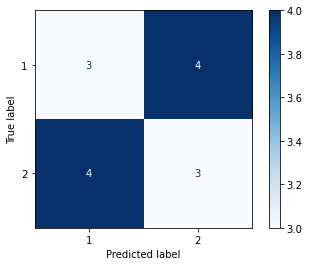

In [195]:
disp = plot_confusion_matrix(rf, test_data,test_labels,
                                 cmap=plt.cm.Blues)

In [196]:
from sklearn.tree import plot_tree

In [197]:
estimator = rf.estimators_[5]

In [207]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = merge.columns,
                class_names = classes,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [147]:
for g in boxscore['team'].unique():
    print("'",g,"'",end =",")

' 9005 ',' 40051 ',' 9007 ',' 9013 ',' 9003 ',' 9221 ',' 9011 ',' 9001 ',' 9002 ',' 9004 ',' 9800 ',' 9006 ',' 9213 ',' 6015 ',' 9230 ',' 9218 ',' 9233 ',' 40000 ',' 9217 ',

In [206]:
classes=['1','2']

In [74]:
data[~data['teamid'].isin([9217,9221,9233,40051,9218])].groupby(['teamid','szezon']).count()

gameid  2PP  3PP  DRB%  ASS%  TOV%  Win%  3PTS/PTS  FTP  date  \
teamid szezon                                                                  
6015   0           26   26   26    26    26    26    26        26   26    26   
       1           26   26   26    26    26    26    26        26   26    26   
       5           26   26   26    26    26    26    26        26   26    26   
       6           26   26   26    26    26    26    26        26   26    26   
       7           26   26   26    26    26    26    26        26   26    26   
...               ...  ...  ...   ...   ...   ...   ...       ...  ...   ...   
9800   9           20   20   20    20    20    20    20        20   20    20   
40000  7           26   26   26    26    26    26    26        26   26    26   
       8           26   26   26    26    26    26    26        26   26    26   
       9           20   20   20    20    20    20    20        20   20    20   
40010  9           20   20   20    20    20    20    20        20   20    20   

               FT/PTS  Poss  OffRating  DF  DefRating  ST%  ORB%  BL%  \
teamid szezon                                                           
6015   0           26    26         26  26         26   26    26   26   
       1           26    26         26  26         26   26    26   26   
       5           26    26         26  26         26   26    26   26   
       6           26    26         26  26         26   26    26   26   
       7           26    26         26  26         26   26    26   26   
...               ...   ...        ...  ..        ...  ...   ...  ...   
9800   9           20    20         20  20         20   20    20   20   
40000  7           26    26         26  26         26   26    26   26   
       8           26    26         26  26         26   26    26   26   
       9           20    20         20  20         20   20    20   20   
40010  9           20    20         20  20         20   20    20   20   

               Opp_3PP  Opp_2PP  
teamid szezon                    
6015   0            26       26  
       1            26       26  
       5            26       26  
       6            26       26  
       7            26       26  
...                ...      ...  
9800   9            20       20  
40000  7            26       26  
       8            26       26  
       9            20       20  
40010  9            20       20  

[125 rows x 20 columns]

In [159]:
merge.isnull().values.any()

False

In [144]:
nan_rows = merge[merge.isnull().T.any().T]

In [145]:
nan_rows[['gameid','teamid_1','teamid_2']]

,gameid,teamid_1,teamid_2
9,994.0,9007.0,9217.0
15,1002.0,9005.0,9217.0
16,1005.0,9217.0,40000.0
20,1011.0,9001.0,9217.0
26,1021.0,9213.0,9217.0
33,1028.0,9003.0,9217.0
37,1032.0,9217.0,9800.0
40,1043.0,9217.0,9230.0
51,1051.0,9006.0,9217.0
55,1057.0,9013.0,9217.0
